In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/WELFake_Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv')

In [ ]:
#first 5 step in data
dataset.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [ ]:
#content of the data
dataset.shape

(72134, 4)

In [ ]:
#information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#sum of missing values of the data
dataset.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
#erases lost precious lines
df_cleaned = dataset.dropna()

In [ ]:
#new sum of missing values
df_cleaned.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
#information about cleaned data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [ ]:
#Download "natural language toolkit library" for NLP
!pip install nltk

In [ ]:
import nltk

In [ ]:
#common words with little or no meaning, often extracted in text processing and natural language processing (NLP) projects.
from nltk.corpus import stopwords

In [ ]:
#download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#lenght of stop words
len(stop_words)

179

In [ ]:
#columns of cleaned data actually the same as the other data
df_cleaned.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
#It is not acceptep if you write with "Unnamed : 0"
df_cleaned.drop('Unnamed: 0', axis = 1, inplace = True)

<ipython-input-18-f2ffa1a45180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('Unnamed: 0', axis = 1, inplace = True)


In [ ]:
#deleted unnamed:0
print(df_cleaned.columns)

Index(['title', 'text', 'label'], dtype='object')


In [ ]:
#create a new columns called "complete_text" and combine(concat) title and text
df_cleaned["complete_text"] = df_cleaned["title"] + df_cleaned["text"]

<ipython-input-20-ba78f2238c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["complete_text"] = df_cleaned["title"] + df_cleaned["text"]


In [ ]:
#it worked obviously
print(df_cleaned.columns)

Index(['title', 'text', 'label', 'complete_text'], dtype='object')


In [ ]:
#index of 3
df_cleaned['complete_text'][3]
#it worked again no problem xd

'Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bidA dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor

In [ ]:
df_cleaned.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                       complete_text  
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...  
3  Bobby Jindal, raised Hindu, uses story of Chri...  
4  SATAN 2: Russia unvelis an image of its terrif...  
5  About Time! Christian Group Sues Amazon and SP...

In [ ]:
!pip install gensim

In [ ]:
#Gensim is a powerful library for NLP and text mining
import gensim

In [ ]:
!pip install preprocessing

In [ ]:
#for word stem finding algorithm
!pip install porter

  Using cached porter-0.1.5-py3-none-any.whl


In [ ]:
#smart_open is a python library that facilitates reading and writing large files.
!pip install --upgrade smart_open

In [ ]:
#the function removes stopwprds from a given text and extracts meaningful words
def stop_word_remover(text):
    result = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in stop_words and word not in gensim.parsing.preprocessing.STOPWORDS and len(word)>3:
            result.append(word)
    return result


In [ ]:
#It applies the stop_word_remover function on each text in the “complete_text” column and adds the results as a new column to the df_cleaned DataFrame. This new column is named “clean_list”.
df_cleaned['clean_list'] = df_cleaned['complete_text'].apply(stop_word_remover)

<ipython-input-30-e97acbb12b85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clean_list'] = df_cleaned['complete_text'].apply(stop_word_remover)


In [ ]:
df_cleaned.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                       complete_text  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                          clean_list  
0  [enforcement, high, alert, following, threats,...  
2  [unbelievable, obama, attorney, general, says,...  
3  [bobby, jindal, raised, hindu, uses, story, ch...  
4  [satan, russia, unvelis, image, terrifying, su...  
5  [time, christian, group, sues, amazon, splc, d...

In [ ]:
#index value from clean_list
print(df_cleaned['clean_list'][0])

['enforcement', 'high', 'alert', 'following', 'threats', 'cops', 'whites', 'terrorists', 'video', 'comment', 'expected', 'barack', 'obama', 'members', 'fukyoflag', 'movements', 'called', 'lynching', 'hanging', 'white', 'people', 'cops', 'encouraged', 'radio', 'tuesday', 'night', 'turn', 'tide', 'kill', 'white', 'people', 'cops', 'send', 'message', 'killing', 'black', 'people', 'america', 'yoflag', 'organizers', 'called', 'sunshine', 'radio', 'blog', 'hosted', 'texas', 'called', 'sunshine', 'opinion', 'radio', 'snapshot', 'lolatwhitefear', 'twitter', 'page', 'shows', 'urging', 'supporters', 'tonight', 'continue', 'dismantle', 'illusion', 'white', 'snapshot', 'twitter', 'radio', 'invite', 'radio', 'aired', 'eastern', 'standard', 'time', 'callers', 'clearly', 'lynching', 'killing', 'white', 'people', 'minute', 'clip', 'radio', 'heard', 'provided', 'breitbart', 'texas', 'like', 'referred', 'hannibal', 'received', 'death', 'threats', 'result', 'interrupting', 'conference', 'calls', 'unident

In [ ]:
#All words in the df_cleaned['clean_list'] column are added to a single list, total_words.
total_words = []
for token in df_cleaned['clean_list']:
  for word in token:
    total_words.append(word)

In [ ]:
#total words lenght
len(total_words)

19075347

In [ ]:
total_array = np.array(total_words)

In [ ]:
#we found unique words
unique_words = np.unique(total_array)

In [ ]:
print(unique_words)

['a_h_goldstein' 'a_merrill' 'a_n_t_s_' ... '集体提出创新办法' '预防和解决冲突' 'ﬁnds']


In [ ]:
len_uniq = len(unique_words)

In [ ]:
print (len_uniq) #lenght of uniique words

246188


In [ ]:
#Combines the lists of words in the clean_list column of the DataFrame named df_cleaned into a single space-separated text string and adds them to a new column named clean_text.
df_cleaned['clean_text'] = df_cleaned['clean_list'].apply(lambda x: " ".join(x))

<ipython-input-40-6b689469178f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clean_text'] = df_cleaned['clean_list'].apply(lambda x: " ".join(x))


In [ ]:
df_cleaned.head() #useless code but that's how I know it works.

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                       complete_text  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                          clean_list  \
0  [enforcement, high, alert, following, threats,...   
2  [unbelievable, obama, attorney, general, says,...   
3  [bobby, jindal, raised, hindu, uses, story, ch...   
4  [satan, russia, unvelis, image, terrifying, su...   
5  [time, christian, group, sues, amazon, splc, d...   

                                          clean_text  
0  enforcement high alert following threats cops ...  
2  unbelievable obama attorney general says charl...  
3  bobby jindal raised hindu uses story christian...  
4  satan russia unvelis image terrifying supernuk...  
5  time christian group sues amazon splc designat...

In [ ]:
print(df_cleaned['clean_text'][0])

enforcement high alert following threats cops whites terrorists video comment expected barack obama members fukyoflag movements called lynching hanging white people cops encouraged radio tuesday night turn tide kill white people cops send message killing black people america yoflag organizers called sunshine radio blog hosted texas called sunshine opinion radio snapshot lolatwhitefear twitter page shows urging supporters tonight continue dismantle illusion white snapshot twitter radio invite radio aired eastern standard time callers clearly lynching killing white people minute clip radio heard provided breitbart texas like referred hannibal received death threats result interrupting conference calls unidentified black said mother kers start like bunch takin roll said cause roll gangs seven black mother ckers white person lynch turn tables conspired cops started losing people state emergency speculated things happen going start backin getting killed lose sunshine heard saying true king 

<ipython-input-43-8aebdc3e0e22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label',data = df_cleaned, palette=["#3498db", "#e74c3c"]) #palatte for colors


<Axes: xlabel='count', ylabel='label'>

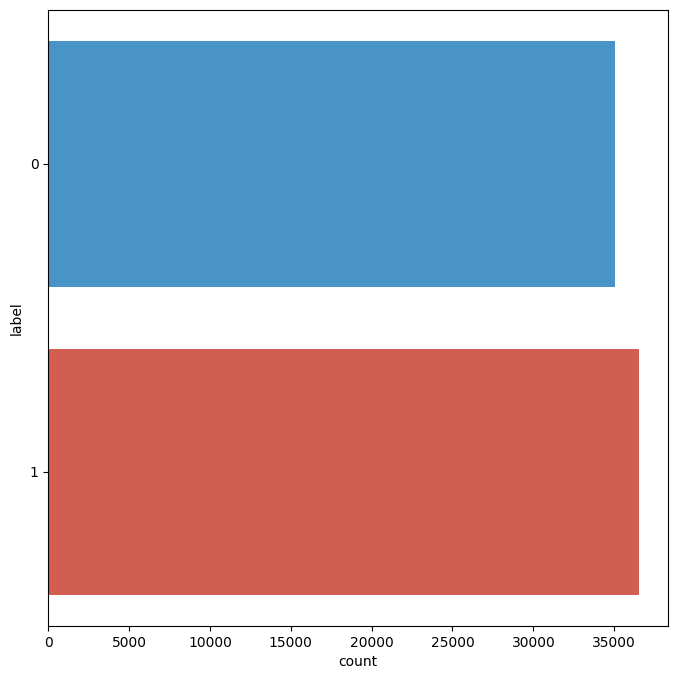

In [ ]:
#Visualizes the class distribution in the “label” column.
plt.figure(figsize=(8,8))
sns.countplot(y='label',data = df_cleaned, palette=["#3498db", "#e74c3c"]) #palatte for colors

In [ ]:
#df_cleaned combines all the text in the “clean_text” column of the DataFrame into a single large text (string) and assigns it to a variable called complete_text.
complete_text = df_cleaned["clean_text"].str.cat(sep=" ")

In [ ]:
len(complete_text)

149136116

In [ ]:
print(complete_text[0:10000]) #first 10k values

enforcement high alert following threats cops whites terrorists video comment expected barack obama members fukyoflag movements called lynching hanging white people cops encouraged radio tuesday night turn tide kill white people cops send message killing black people america yoflag organizers called sunshine radio blog hosted texas called sunshine opinion radio snapshot lolatwhitefear twitter page shows urging supporters tonight continue dismantle illusion white snapshot twitter radio invite radio aired eastern standard time callers clearly lynching killing white people minute clip radio heard provided breitbart texas like referred hannibal received death threats result interrupting conference calls unidentified black said mother kers start like bunch takin roll said cause roll gangs seven black mother ckers white person lynch turn tables conspired cops started losing people state emergency speculated things happen going start backin getting killed lose sunshine heard saying true king 

In [ ]:
# Word clouds are graphs that visually represent the most frequently used words in a text. In these graphs, the size of the word indicates how often it occurs in the text, i.e. larger words are more frequently used words.
#IMPORTANT FOR NLP
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud as WC

In [ ]:
#first 10k values in complete_text
short_text = complete_text[:100000]

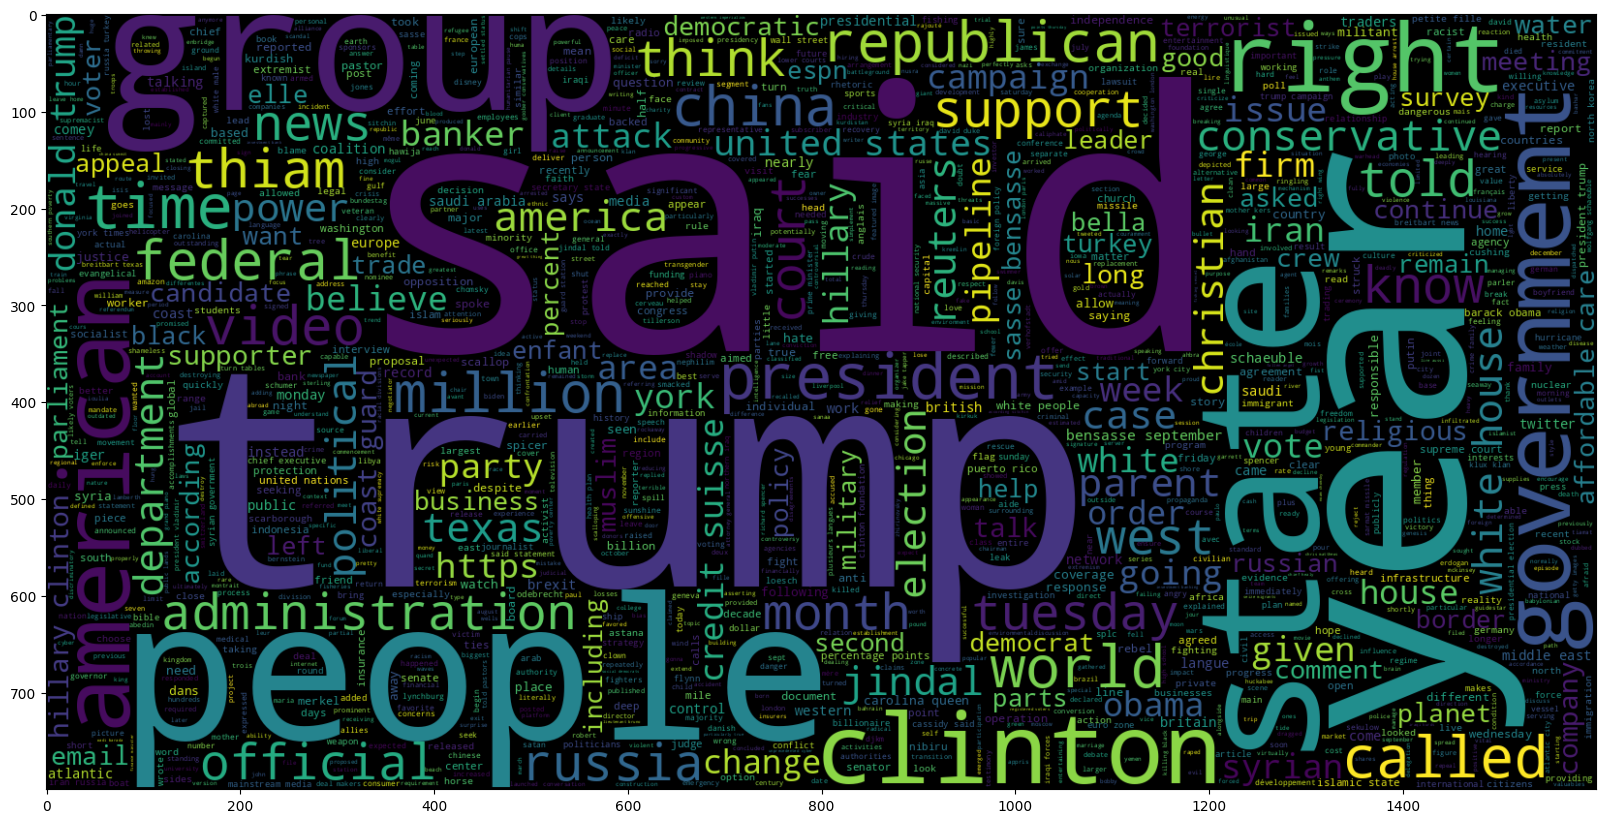

In [ ]:
plt.figure(figsize=(20,20))
wc = WC(max_words = 2000,width = 1600,height = 800, background_color="black").generate(short_text)
plt.imshow(wc,interpolation="bilinear")

In [ ]:
real = df_cleaned[df_cleaned['label']==1]
fake = df_cleaned[df_cleaned['label']==0]

In [ ]:
print("size of real dataset: {}".format(real.shape))
print("size of fake dataset: {}".format(fake.shape))
print("size of original dataset: {}".format(df_cleaned.shape))

size of real dataset: (36509, 6)
size of fake dataset: (35028, 6)
size of original dataset: (71537, 6)


In [ ]:
#Now we make a cloud for the most repeated words in real and fake news

real_complete_text = real['clean_text'].str.cat(sep=" ")
fake_complete_text = fake['clean_text'].str.cat(sep=" ")

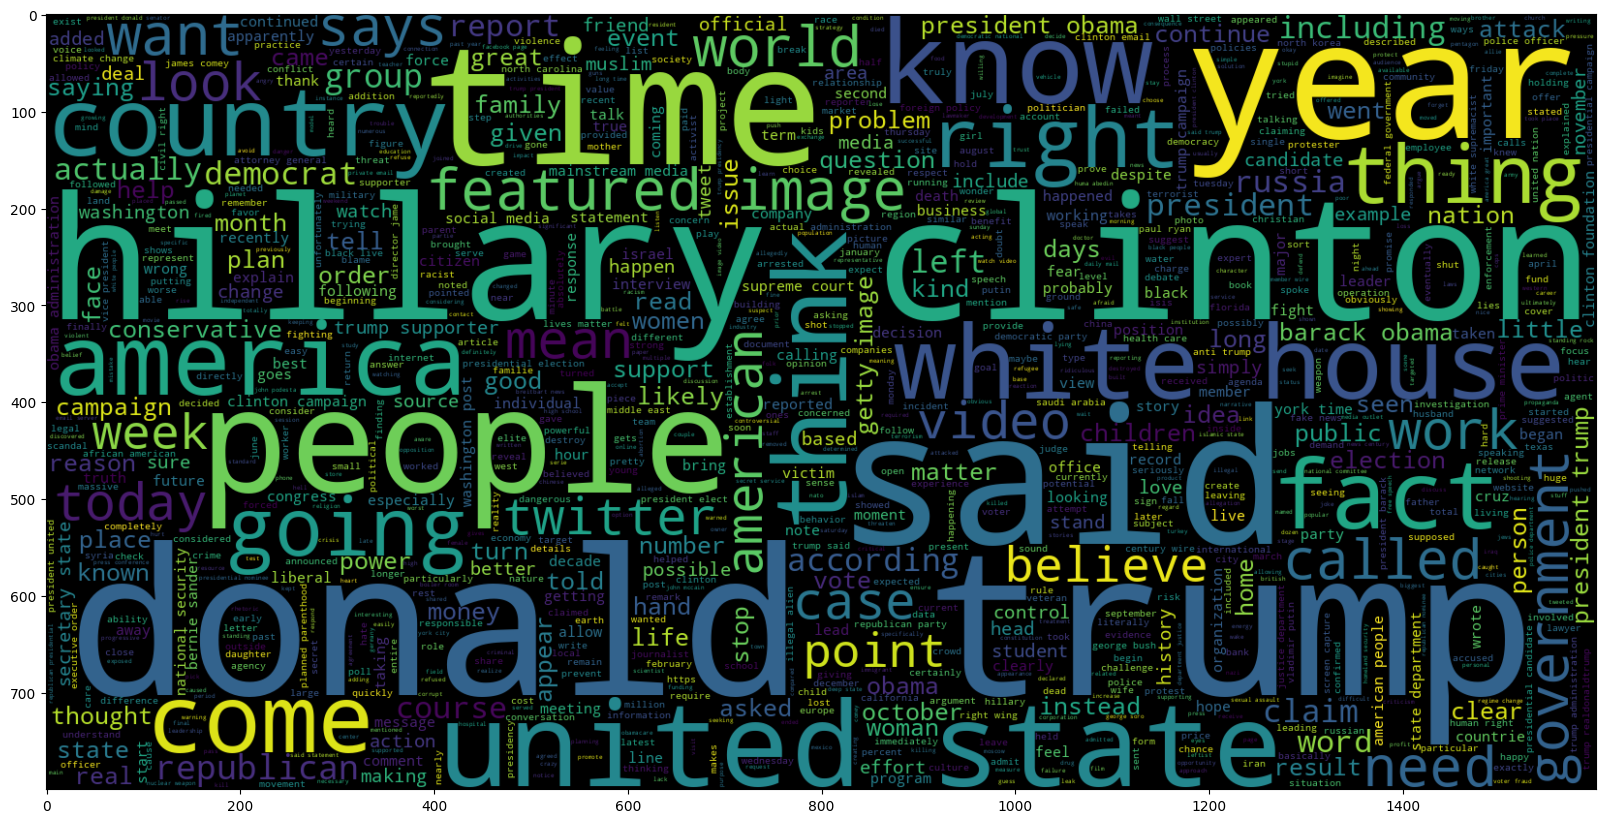

In [ ]:
# WORD CLOUD FOR real_complete_text
plt.figure(figsize=(20,20))
wc = WC(max_words = 1000,width = 1600,height = 800,background_color='black').generate(real_complete_text)
plt.imshow(wc,interpolation="bilinear")

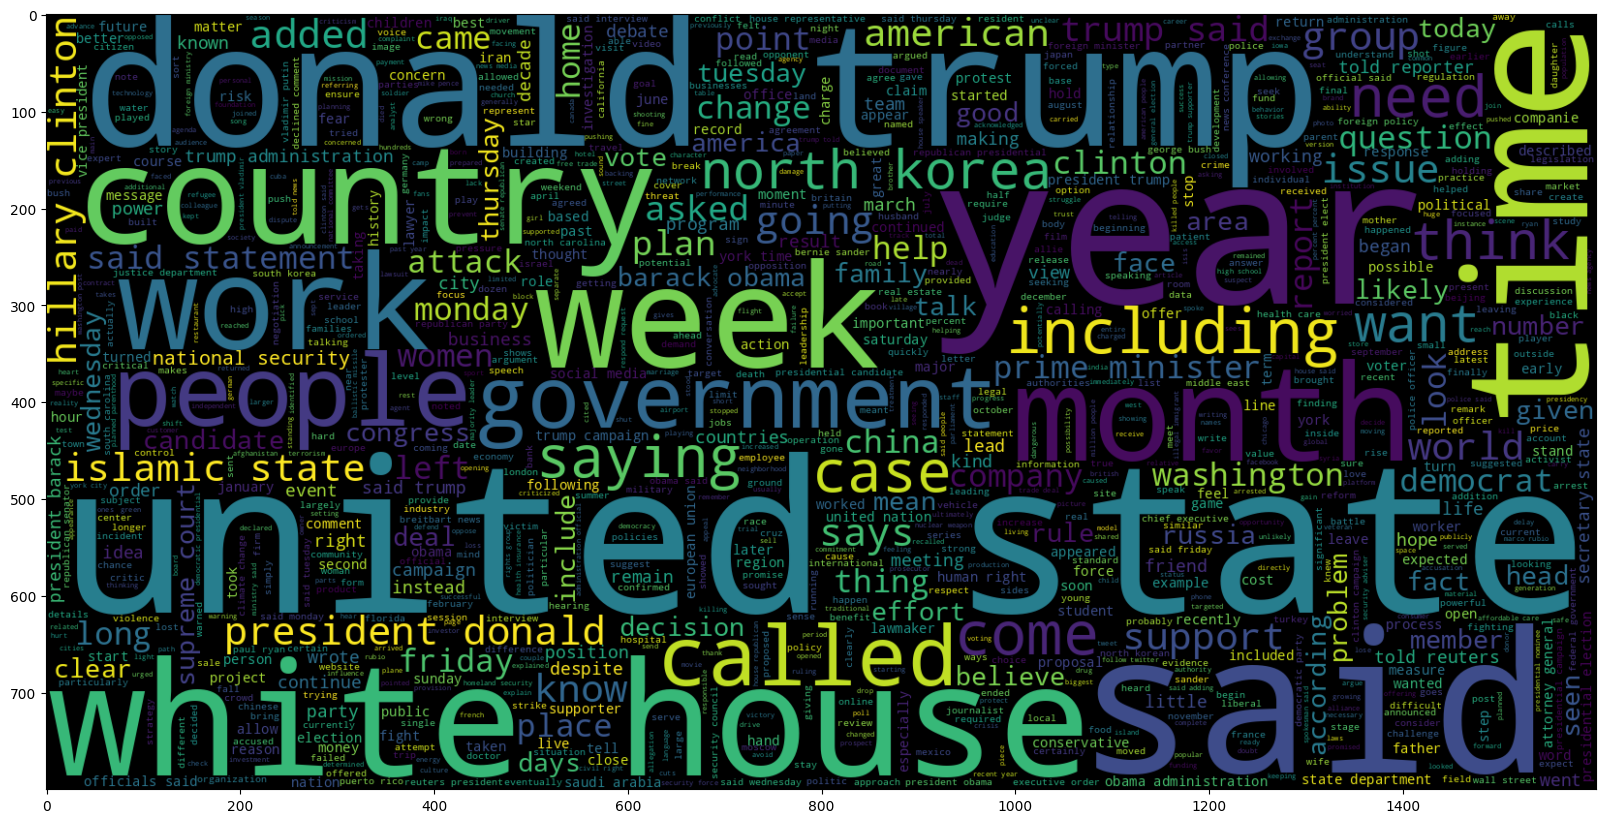

In [ ]:
#WORD CLOUD FOR fake_complete_text
plt.figure(figsize=(20,20))
wc = WC(max_words = 1000,width = 1600,height = 800,background_color='black').generate(fake_complete_text)
plt.imshow(wc,interpolation= "bilinear")

In [ ]:
len(df_cleaned['clean_list'][5])

138

In [ ]:
len_of_news = []
for news in df_cleaned['clean_list']:
    len_of_news.append(len(news))

In [ ]:
max(len_of_news)

13688

In [ ]:
min(len_of_news)

1

In [ ]:
max_len_of_news = max(len_of_news)

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(x = len_of_news, nbins = 200)#Aralık sayısı(bin) = 200from sklearn.model_selection import train_test_split
fig.show()


In [ ]:
#train - test
from sklearn.model_selection import train_test_split

In [ ]:
df_cleaned.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   
5  All we can say on this one is it s about time ...      1   

                                       complete_text  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   
5  About Time! Christian Group Sues Amazon and SP...   

                                          clean_list  \
0  [enforcement, high, alert, following, threats,...   
2  [unbelievable, obama, attorney, general, says,...   
3  [bobby, jindal, raised, hindu, uses, story, ch...   
4  [satan, russia, unvelis, image, terrifying, su...   
5  [time, christian, group, sues, amazon, splc, d...   

                                          clean_text  
0  enforcement high alert following threats cops ...  
2  unbelievable obama attorney general says charl...  
3  bobby jindal raised hindu uses story christian...  
4  satan russia unvelis image terrifying supernuk...  
5  time christian group sues amazon splc designat...

In [ ]:
x = df_cleaned['clean_text'].values

In [ ]:
x[0:10] #0-10 index (expect for 10) all values

array(['enforcement high alert following threats cops whites terrorists video comment expected barack obama members fukyoflag movements called lynching hanging white people cops encouraged radio tuesday night turn tide kill white people cops send message killing black people america yoflag organizers called sunshine radio blog hosted texas called sunshine opinion radio snapshot lolatwhitefear twitter page shows urging supporters tonight continue dismantle illusion white snapshot twitter radio invite radio aired eastern standard time callers clearly lynching killing white people minute clip radio heard provided breitbart texas like referred hannibal received death threats result interrupting conference calls unidentified black said mother kers start like bunch takin roll said cause roll gangs seven black mother ckers white person lynch turn tables conspired cops started losing people state emergency speculated things happen going start backin getting killed lose sunshine heard saying tr

In [ ]:
y = df_cleaned['label'].values

In [ ]:
y.shape

(71537,)

In [ ]:
x.shape

(71537,)

In [ ]:
!pip install tensorflow

In [ ]:
#Tokenize the text for the model training.
#Because the model can only be trained on numerical values !!!
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
total_words = 19075347
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
text_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(train_sequences)

57229

In [ ]:
test_sequences = text_sequences

In [ ]:
len(test_sequences)

14308

In [ ]:
print(x_train[0])

leftist hate steroids donald trump tombstone appears nycsuggesting person killed left disagrees desire america great pale lets discuss micro aggressions demands safe spaces tombstone donald trump mysteriously appeared central park weekend week thousand avowed communists socialists bernie sanders fans illegal immigration activists took anti trump protest central partk gothamist posted tweet showing tombstone reads america hate photo visit donald trump tombstone central park https jetfxbxufj twitter jvbkysmkui gothamist gothamist march breitbart news reported media republicans castigated trump violence fact calls trump death gone unpunished social media sites like twitter following tweets sample hours think gonna assassinate donald trump inuyashiha march going hire deep assassinate donald trump cube head iovegiow march fazeblaziken likes assassinate trump adam gomez kingprimolol march patrickfoster personally understand kickstarter assassinate trump eric karjaluoto karj march assassinate

In [ ]:
print(train_sequences[0])

[1854, 640, 13214, 14, 2, 22888, 741, 88754, 215, 214, 82, 7881, 1918, 39, 132, 9329, 5769, 897, 11861, 19671, 1844, 760, 5459, 22888, 14, 2, 12738, 564, 414, 1149, 874, 53, 3156, 15986, 6754, 8589, 589, 156, 1517, 286, 189, 991, 112, 171, 2, 709, 414, 88755, 34284, 587, 820, 948, 22888, 2924, 39, 640, 810, 517, 14, 2, 22888, 414, 1149, 512, 88756, 52, 88757, 34284, 34284, 246, 443, 18, 126, 28, 59, 18545, 2, 260, 113, 420, 2, 252, 887, 20292, 143, 28, 1621, 7, 52, 281, 1332, 5039, 419, 37, 2546, 9498, 14, 2, 88758, 246, 30, 2994, 788, 9498, 14, 2, 11065, 245, 88759, 246, 88760, 2433, 9498, 2, 2899, 15399, 88761, 246, 88762, 1776, 579, 24299, 9498, 2, 1423, 88763, 88764, 246, 9498, 14, 2, 672, 17689, 248, 672, 5996, 1, 1776, 163, 1046, 2, 139, 9498, 14, 88765, 212, 999, 2812, 18018, 44, 88766, 37, 37, 672, 398, 3225, 59, 10141, 443, 18]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen = max_len_of_news, padding = 'post',truncating = 'post')
padded_text = pad_sequences(test_sequences,maxlen = max_len_of_news,padding = 'post',truncating = 'post')

In [ ]:
paddes_test = padded_text

In [ ]:
padded_train[0]

array([ 1854,   640, 13214, ...,     0,     0,     0], dtype=int32)

In [ ]:
total_words

19075347

In [ ]:
unique_words = len(unique_words)

In [ ]:
unique_words

246188

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, Embedding, Input

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
import tensorflow as tf

In [ ]:
#training our model
model = Sequential()
model.add(Input(shape=(13689,)))
model.add(Embedding(input_dim=unique_words, output_dim=12))
model.add(Bidirectional(LSTM(12)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 13689, 12)           │       2,954,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 24)                  │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,956,969 (11.28 MB)

 Trainable params: 2,956,969 (11.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train.shape

(57229,)

In [ ]:
y_train.shape

(57229,)

In [ ]:
padded_train.shape

(57229, 13688)

In [ ]:
#model.fit(padded_train,y_train,batch_size=16,validation_split=0.1,epochs=2)

In [ ]:
subset_size = int(0.50 * len(padded_train))  # Veri kümesinin %10'u
padded_train_subset = padded_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Modeli daha küçük veri kümesi ile eğitmek
model.fit(padded_train_subset, y_train_subset, batch_size=16, validation_split=0.1, epochs=2)

Epoch 1/2
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 979s 603ms/step - accuracy: 0.8640 - loss: 0.3055 - val_accuracy: 0.9413 - val_loss: 0.1569
Epoch 2/2
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 980s 605ms/step - accuracy: 0.9770 - loss: 0.0721 - val_accuracy: 0.9340 - val_loss: 0.2011


In [ ]:
model.save('fake_new_detection.h5')

In [ ]:
# now it is time for evaluating model.
predictions = model.predict(padded_text)

448/448 ━━━━━━━━━━━━━━━━━━━━ 123s 274ms/step


In [ ]:
pred = []
for i in range(len(predictions)):
    if predictions[i]>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [ ]:
pred[0:10]

[1, 0, 0, 1, 0, 1, 1, 0, 1, 1]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_score = accuracy_score(list(y_test),pred)

In [ ]:
print("the model's accuracy is: ",acc_score)

the model's accuracy is:  0.9315068493150684


In [ ]:
from sklearn.metrics import confusion_matrix

<Axes: >

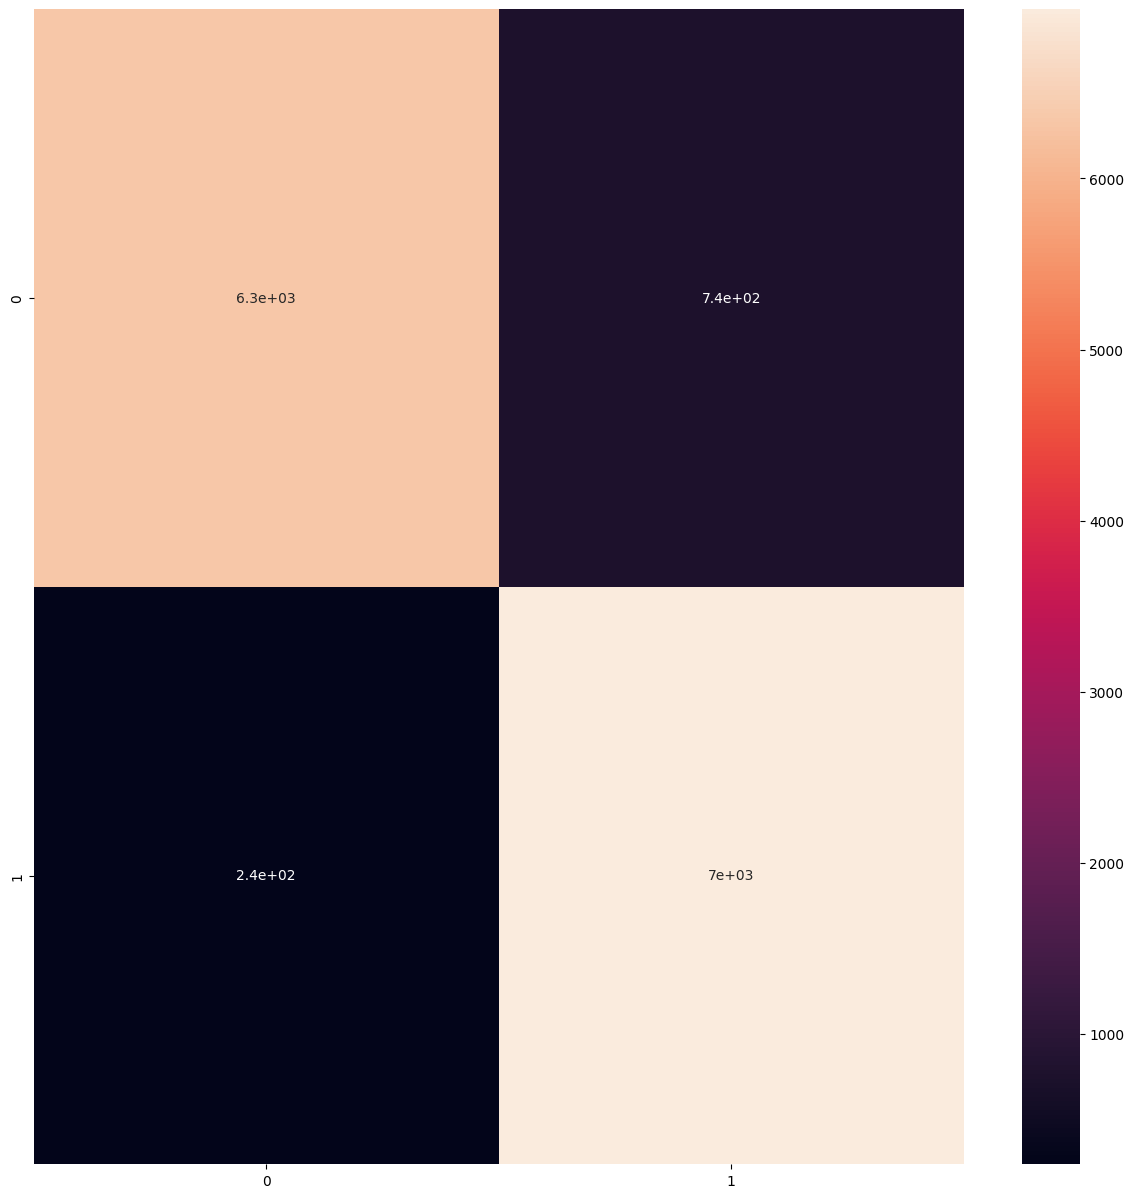

In [ ]:
cm = confusion_matrix(list(y_test),pred)
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True)